In [1]:
import pairmodule as pair
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import StratifiedKFold
from joblib import dump, load
import os
import numpy as np
import time
import scipy.stats as stats
from scipy.special import factorial
import csv
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.stats.multitest as sm
from fisher import pvalue_npy
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.metrics import average_precision_score
from mpl_toolkits import mplot3d
import pairmodule as pair

In [2]:
import numpy as np
import numpy as np
import pandas as pd
import statsmodels.stats.multitest as sm
from fisher import pvalue_npy
from tqdm import tqdm, trange
import os
from sklearn.metrics import *

In [3]:
symbol=pd.read_csv('./GSE63085/GSM1540487_01-20_V1_cuff.txt',sep='\t',usecols=[3])

 
file_dir="./GSE63085"
all_file_list=os.listdir(file_dir)
for single_file in all_file_list: 
    single_data_frame=pd.read_csv(
            os.path.join(file_dir,single_file),sep='\t',usecols=[9])
    if single_file ==all_file_list[0]:
        all_data_frame=single_data_frame
    else:        
         all_data_frame=pd.concat([all_data_frame,
                    single_data_frame],ignore_index=True,axis=1)
            
x_test4=pd.concat([symbol,all_data_frame],axis=1)

y_test4=np.ones(84)
t=np.zeros(13)
y_test4=np.append(y_test4,t)
y_test4

x_test1=pd.read_csv('./GSE196192/GSE196192_Lyme-PBMC-transcriptome-set2.counts.txt',sep='\t',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
x_test2=pd.read_csv('./GSE153261/GSE153261_All_Counts_and_DESeq.txt',sep='\t',usecols=[0,7,8,9,10,11,12])
x_test3=pd.read_csv('./GSE77929.txt',sep='\t',encoding='utf-16')
x_train=pd.read_csv("./GSE145974/GSE145974_series_matrix_1.txt",sep="\t")

geneID = pd.read_csv('./GPL13667-15572_1.csv',usecols=[0,1])
geneID.columns = ['ID_REF','symbol']
x_train = pd.merge(x_train,geneID,on='ID_REF',how='left')
x_train.insert(loc=1,
             column='SYMBOL',
             value=x_train['symbol'])
x_train.drop(columns='symbol',inplace=True)
x_train.drop(columns='ID_REF',inplace=True)
x_train=x_train.groupby('SYMBOL').mean()
x_train.drop(index='---',inplace=True)

irg=pd.read_csv("./immune related genes.csv",usecols=[0])
irg.rename(columns={'Gene Name':'SYMBOL'},inplace=True)

y_train=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
x_train.reset_index(inplace=True)
x_train=pd.merge(irg,x_train,on='SYMBOL',how='left')


In [4]:
x_test1.rename(columns={'GENE':'SYMBOL'},inplace=True)
x_test2.rename(columns={'Gene':'SYMBOL'},inplace=True)
x_test3.rename(columns={'gene_id':'SYMBOL'},inplace=True)
x_test4.rename(columns={'gene_id':'SYMBOL'},inplace=True)

x_test1=pd.merge(irg,x_test1,on='SYMBOL',how='left')
x_test2=pd.merge(irg,x_test2,on='SYMBOL',how='left')
x_test3=pd.merge(irg,x_test3,on='SYMBOL',how='left')
x_test4=pd.merge(irg,x_test4,on='SYMBOL',how='left')

x_test3=x_test3.groupby('SYMBOL').mean()
x_test4=x_test4.groupby('SYMBOL').mean()

x_test3.reset_index(inplace=True)
x_test4.reset_index(inplace=True)

x_test1.drop(columns='SYMBOL',inplace=True)
x_test2.drop(columns='SYMBOL',inplace=True)
x_test3.drop(columns='SYMBOL',inplace=True)
x_test4.drop(columns='SYMBOL',inplace=True)
x_train.drop(columns='SYMBOL',inplace=True)

y_test1=np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0])
y_test2=np.array([0,0,0,1,1,1])
y_test3=np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0])

In [5]:
mat=x_train.to_numpy().T
p,a,b,c,d=pair.pair_pvalue(mat,y_train,0)

100%|██████████████████████████████████████████████████████████████████████| 86/86 [00:01<00:00, 62.47it/s]


In [6]:
p.min()

6.638923111518496e-05

In [7]:
a_ = a.reshape((-1,1))
a_ = np.squeeze(a_)
b_ = b.reshape((-1,1))
b_ = np.squeeze(b_)
c_ = c.reshape((-1,1))
c_ = np.squeeze(c_)
d_ = d.reshape((-1,1))
d_ = np.squeeze(d_)

a1=pd.DataFrame(a_)
b1=pd.DataFrame(b_)
c1=pd.DataFrame(c_)
d1=pd.DataFrame(d_)

abcd=pd.concat([a1,b1,c1,d1],axis=1)
abcd.columns=['a','b','c','d']

#    a_ = a_.astype(np.uint)
#    b_ = b_.astype(np.uint)
#    c_ = c_.astype(np.uint)
#    d_ = d_.astype(np.uint)

#    _, _, twosided = pvalue_npy(a_, b_, c_, d_)

#    rejected, pvalue_fdr = sm.fdrcorrection(twosided, method='indep', is_sorted=False)
#    twosided.min()
abcd


,a,b,c,d
0,0,0,0,0
1,7,14,35,30
2,4,17,38,27
3,8,13,34,31
4,5,16,38,27
...,...,...,...,...
592895,10,11,23,42
592896,12,9,35,30
592897,10,11,30,35
592898,9,12,35,30


In [8]:
idx,l=pair.p_screen(p,0.00015)
idx.shape

(170, 2)

In [9]:


idx2=pd.DataFrame(idx)[1]
idx1=pd.DataFrame(idx)[0]

idx1=np.array(idx1)
idx2=np.array(idx2)

idx1=list(idx1)
idx2=list(idx2)
x_train_pair= pair.dftopair(x_train,idx1,idx2,0)

In [10]:
x_train_pair

array([[ 1, -1, -1, ...,  1,  1,  1],
       [ 1, -1, -1, ...,  1,  1,  1],
       [ 1, -1, -1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1, -1, -1],
       [ 1, -1,  1, ...,  1, -1, -1],
       [ 1, -1, -1, ...,  1,  1,  1]])

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train_pair, y_train)

clf = linear_model.Lasso(alpha = 0.05)
clf.fit(x_resampled, y_resampled)
print ("num_lasso_pair = ", np.sum(clf.coef_!=0))
lassoIdx, = np.where(clf.coef_!=0)

predt = clf.predict(x_train_pair)
predt
print ("test ROC AUC: ",metrics.roc_auc_score(y_train, predt))
metrics.roc_auc_score(y_train,predt)
print(lassoIdx)

num_lasso_pair =  19
test ROC AUC:  1.0
[ 17  19  22  29  34  36  38  39  44  57  82 103 111 112 119 122 134 156
 159]


In [12]:
x_test = [x_test1,x_test2,x_test3,x_test4]
y_test = [y_test1,y_test2,y_test3,y_test4]
test_name=['GEO196192','GEO153261','GSE77929','GSE63085']

etc_test1 = pair.dftopair(x_test1,idx1,idx2,0.5)
predt = clf.predict(etc_test1)
metrics.roc_auc_score(y_test1, predt)

0.9102564102564104

In [13]:
etc_test2 = pair.dftopair(x_test2,idx1,idx2,0.5)
predt = clf.predict(etc_test2)
metrics.roc_auc_score(y_test2, predt)

0.888888888888889

In [14]:
etc_test3 = pair.dftopair(x_test3,idx1,idx2,15)
predt = clf.predict(etc_test3)
metrics.roc_auc_score(y_test3, predt)

0.8947368421052632

In [15]:
etc_test4 = pair.dftopair(x_test4,idx1,idx2,15)
predt = clf.predict(etc_test4)
metrics.roc_auc_score(y_test4, predt)

0.570054945054945

In [16]:
diff = 0.5
pthreshold = 0.01

# plot

In [17]:
x_test_1 = [x_test1,x_test2]
y_test_1 = [y_test1,y_test2]
x_test_2 = [x_test3,x_test4]
y_test_2 = [y_test3,y_test4]
test_name_1=['GSE196192','GSE153261']
test_name_2=['GSE77929','GSE63085']

results = pd.DataFrame(columns = ['Cohort','AUC','Model'])
for x_test,y_test,name in zip(x_test_1,y_test_1,test_name_1):
        etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        testresult=clf.predict(etc_test)
        fpr, tpr, _= roc_curve(y_test,testresult)
        roc_auc = auc(fpr,tpr)
        print(roc_auc)
        results = results.append({'Cohort':name,'AUC':roc_auc,'Model':'Pair+Lasso'},ignore_index=True)
for x_test,y_test,name in zip(x_test_2,y_test_2,test_name_2):
        etc_test = pair.dftopair(x_test,idx1,idx2,15)
        testresult=clf.predict(etc_test)
        fpr, tpr, _= roc_curve(y_test,testresult)
        roc_auc = auc(fpr,tpr)
        print(roc_auc)
        results = results.append({'Cohort':name,'AUC':roc_auc,'Model':'Pair+Lasso'},ignore_index=True)

0.9102564102564104
0.888888888888889
0.8947368421052632
0.570054945054945


In [18]:
results

,Cohort,AUC,Model
0,GSE196192,0.910256,Pair+Lasso
1,GSE153261,0.888889,Pair+Lasso
2,GSE77929,0.894737,Pair+Lasso
3,GSE63085,0.570055,Pair+Lasso


colors = ['#9e2a2b','#897966', '#EAB69F',  '#8F5D5D',
         '#3D405B', '#5F797B', '#81B29A', '#BABF95', '#F2CC8F']
names = ["LassoCV","MLP", "DecisionTree",
         "Random Forest", "AdaBoost"]
classifiers = [
    linear_model.LassoCV(cv=5,random_state=5),
    MLPClassifier(hidden_layer_sizes=(1024,),alpha=0.1, max_iter=1000,learning_rate='adaptive', random_state=2),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(random_state=7),
    AdaBoostClassifier(n_estimators=100, learning_rate = 0.1 ,random_state=42)]

for name,clf_ in zip(names,classifiers):
        clf_.fit(x_resampled, y_resampled)
        for x_test,y_test,name_ in zip(x_test_1,y_test_1,test_name_1):
            etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
            predt = clf_.predict(etc_test)
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':name},ignore_index=True)
        for x_test,y_test,name_ in zip(x_test_2,y_test_2,test_name_2):
            etc_test = pair.dftopair(x_test,idx1,idx2,15)
            predt = clf_.predict(etc_test)
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':'Pair'+name},ignore_index=True)


In [20]:
colors = ['#9e2a2b','#897966', '#EAB69F',  '#8F5D5D',
         '#3D405B', '#5F797B', '#81B29A', '#BABF95', '#F2CC8F']
names = ["MLP", "DecisionTree",
         "Random Forest", "AdaBoost"]
classifiers = [
    
    MLPClassifier(hidden_layer_sizes=(1024,),alpha=0.1, max_iter=1000,learning_rate='adaptive', random_state=2),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(random_state=7),
    AdaBoostClassifier(n_estimators=100, learning_rate = 0.1 ,random_state=42)]

for name,clf_ in zip(names,classifiers):
        clf_.fit(x_resampled, y_resampled)
        for x_test,y_test,name_ in zip(x_test_1,y_test_1,test_name_1):
            etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
            #predt = clf_.predict(etc_test)
            predt = clf_.predict_proba(etc_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':'Pair+'+name},ignore_index=True)
        for x_test,y_test,name_ in zip(x_test_2,y_test_2,test_name_2):
            etc_test = pair.dftopair(x_test,idx1,idx2,15)
            #predt = clf_.predict(etc_test)
            predt = clf_.predict_proba(etc_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':'Pair+'+name},ignore_index=True)

In [76]:
def drawML(roc2):
    cohorts = roc2['Cohort'].unique().tolist()
    model_names = roc2['Model'].unique().tolist()

    model_aucs = []
    for model in model_names:
        model_aucs.append(roc2[roc2['Model']==model]['AUC'].tolist())

    num_models = len(model_names)

    shift = num_models // 2 # the middle point to shift

    x = np.arange(len(cohorts))*5  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots(figsize=(15,5))

    model_axs = []
    #colors = ['#9e2a2b','#897966', '#EAB69F',  '#8F5D5D','#3D405B', '#5F797B', '#81B29A', '#BABF95', '#F2CC8F']
    colors = ['#FF0000','#CD0000','#FF1493','#CD1076','#00FF00','#00EE00','#FFA500','#CD8500','#FFF68F','#EEE685','#9e2a2b']

    for i in range(num_models):
        # ax.bar(x + (i-shift)*width, model_aucs[i], width, label=model_names[i],color = colors[i])
        model_axs.append(ax.bar(x + (i-shift)*width, model_aucs[i], width, label=model_names[i],color = colors[i]))
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('AUROC Score',size=15)
    ax.set_title('AUROC on microarray data',size=15)
    ax.set_xticks(x, cohorts,fontsize=14)
    ax.set_ylim(ymin=0,ymax=1.1)
    ax.legend()

    for model_ax in model_axs:
        ax.bar_label(model_ax, padding=-40, fmt='%.3f', rotation='vertical', size=12)

    plt.legend(loc='lower left',bbox_to_anchor = (0,-0.3), ncol=5,prop={'size':12})

    fig.tight_layout()

    # plt.savefig('./figures/rocVSml_bulk.png',dpi=600)
    #plt.savefig(drive + 'Sepsis_Research/figures/'+file_train+'ML0403.png',dpi=100)

    plt.show()

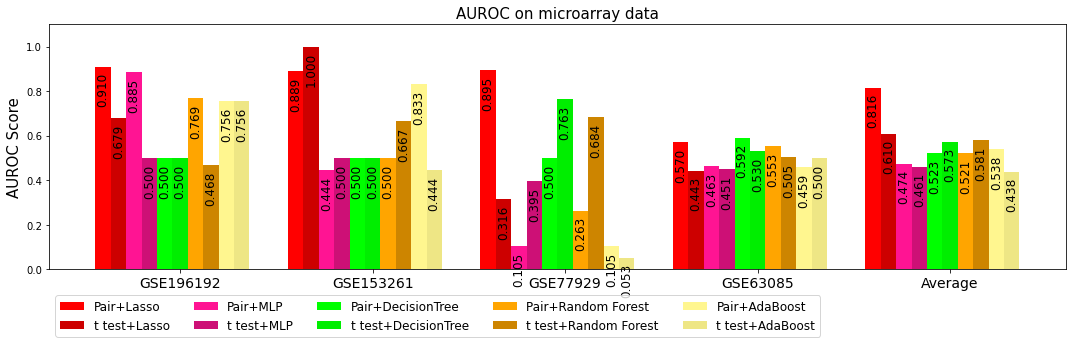

In [78]:
roc2 = results_
for mod in roc2['Model'].unique().tolist():
        average = roc2[roc2['Model'] == mod]['AUC'].mean()
        roc2 = roc2.append({'Cohort':'Average','AUC':average,'Model':mod},ignore_index=True)
drawML(roc2)

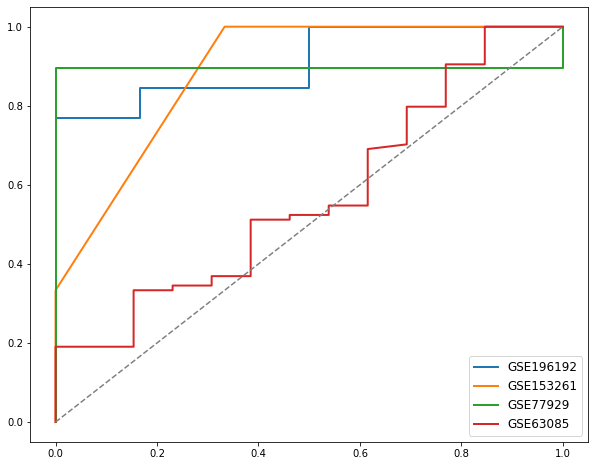

In [238]:
x_test_1 = [x_test1,x_test2,x_test3,x_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']
etc_test1 = pair.dftopair(x_test1,idx1,idx2,0.5)
etc_test2 = pair.dftopair(x_test2,idx1,idx2,0.5)
etc_test3 = pair.dftopair(x_test3,idx1,idx2,15)
etc_test4 = pair.dftopair(x_test4,idx1,idx2,15)
etc_test = [etc_test1,etc_test2,etc_test3,etc_test4]


fig,ax = plt.subplots(figsize=(10,8))
for x_test,y_test,name in zip(etc_test,y_test_1,test_name_1):
        #etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        testresult=clf.predict(x_test)
        #tr_pre=clf.predict_proba(cancer_X_test)[:,1]
        fpr, tpr, _= roc_curve(y_test,testresult)
        #roc_auc = auc(fpr,tpr)
        ax.plot(fpr,tpr,linewidth=2,label=name)
        #print(roc_auc)
ax.plot([0,1],[0,1],linestyle='--',color='grey')
plt.legend(fontsize=12)
plt.show()
        

# t test

In [21]:

import numpy as np
from scipy import stats

Ttest_indResult(statistic=2.3687247600090906, pvalue=0.017977501998242634)

In [22]:
x_train_2=x_train.dropna()

In [23]:
x_train_2.iloc[:,:21]

,GSM4340492,GSM4340493,GSM4340494,GSM4340495,GSM4340496,GSM4340497,GSM4340498,GSM4340499,GSM4340500,GSM4340501,...,GSM4340503,GSM4340504,GSM4340505,GSM4340506,GSM4340507,GSM4340508,GSM4340509,GSM4340510,GSM4340511,GSM4340512
0,-0.419027,0.441480,1.116024,0.192766,0.173050,0.494130,-0.283572,-0.254789,-0.520537,-0.483172,...,0.892769,1.070001,1.196187,-0.116026,-0.065010,0.095856,0.023527,0.662594,0.512991,1.038771
1,0.079766,0.022538,0.547420,0.116279,-0.198502,0.568227,0.062946,0.105253,-0.168174,-0.212587,...,0.039882,0.032043,0.205474,-0.170352,0.130764,-0.161562,0.020163,0.512097,0.140468,0.668608
2,0.116007,-0.463791,-0.166224,-0.768895,-0.075060,-0.189436,-0.234017,0.302245,-0.586140,-1.223227,...,-0.163556,0.244413,0.304632,-1.330171,0.048602,-0.031582,-0.031459,-1.401711,-0.482538,-0.049069
3,0.050682,0.137791,-0.091347,0.249658,0.742067,0.656206,0.146089,0.407424,0.197435,0.081802,...,0.030965,0.075320,-0.299398,-0.180432,-0.249080,0.046028,-0.069598,0.081714,-0.137534,0.221496
4,-0.325215,-0.871442,-0.233425,-0.089902,0.360560,-0.850721,-0.895170,-0.007667,0.124276,0.040524,...,-0.427094,0.252540,-0.107119,-0.724162,-0.711341,-0.695422,-0.518126,-0.177037,0.344069,-0.883458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.694085,0.113807,-0.319134,0.241634,0.064888,0.184126,-0.761122,0.049743,-0.098854,-0.517012,...,-0.051532,-0.000015,0.144018,0.035134,-0.019249,-0.033400,0.499735,-0.277159,-0.133636,0.398315
766,0.130520,0.025521,0.552721,-0.004228,-0.238545,0.142876,0.121597,0.168597,-0.183170,0.003982,...,-0.173415,-0.005482,0.112420,0.296143,0.058160,-0.060295,0.340907,0.749442,-0.104886,0.239946
767,-1.267966,0.420225,-1.261273,0.071298,0.048617,-0.055591,0.520576,0.672755,0.207618,-0.165708,...,0.085016,-0.427895,-0.150421,-0.418523,0.120300,0.161205,0.664702,-0.211992,-0.133291,-0.286120
768,-0.582188,-0.302996,0.803541,-0.268771,-0.363265,0.423734,0.227174,0.044249,0.254588,0.012151,...,-0.289635,-0.265508,0.212795,-0.023779,-0.159095,0.218362,0.290147,0.215408,-0.571569,-0.525651


In [24]:
sm_1=x_train_2.iloc[:,:21].T

In [25]:
sm_2=x_train_2.iloc[:,21:].T

# t test

In [26]:
sm_2.shape

(65, 740)

In [27]:
sm_1.shape

(21, 740)

In [28]:
_,p_=stats.ttest_ind(a=sm_1, b=sm_2, alternative="two-sided")

In [29]:
p_

array([2.43191408e-01, 3.42469728e-01, 6.25995768e-03, 2.01700236e-02,
       6.97687376e-03, 8.95244827e-01, 9.43985361e-01, 5.35153387e-01,
       1.91860006e-01, 6.42170311e-03, 2.69744118e-02, 6.03543287e-01,
       1.43815953e-04, 9.82798883e-01, 2.57585837e-01, 5.64397087e-01,
       7.99777725e-01, 8.71607105e-01, 1.20422941e-01, 1.31480743e-02,
       9.40670948e-01, 3.60754837e-01, 1.70839201e-01, 5.52162791e-01,
       1.58406022e-01, 8.26890356e-02, 8.42789708e-01, 1.94615346e-02,
       7.77859390e-03, 7.63326728e-02, 3.51325544e-03, 8.43582456e-03,
       2.20717633e-01, 2.23517507e-05, 2.80586788e-01, 4.43226513e-01,
       1.08031108e-01, 4.97700590e-01, 2.47835090e-01, 1.71699385e-01,
       1.46804568e-01, 3.57396654e-01, 1.95868455e-04, 1.26966511e-05,
       1.88741155e-01, 3.22902778e-01, 8.29359836e-02, 3.58861005e-01,
       8.91562184e-01, 8.79253963e-01, 5.10166814e-01, 5.20112455e-01,
       1.95420513e-01, 9.27720573e-01, 8.14803919e-01, 2.67080515e-01,
      

In [30]:
p_.shape

(740,)

In [31]:
np.where(p_ < 0.005)

(array([ 12,  30,  33,  42,  43,  64,  66,  88,  96, 108, 134, 143, 146,
        155, 178, 184, 193, 195, 201, 203, 212, 226, 228, 236, 243, 245,
        248, 249, 250, 256, 259, 267, 270, 288, 293, 303, 304, 327, 334,
        344, 347, 353, 356, 367, 371, 392, 407, 409, 410, 416, 419, 435,
        436, 437, 443, 463, 470, 471, 494, 495, 502, 504, 521, 529, 531,
        541, 548, 552, 553, 574, 579, 586, 587, 608, 618, 627, 628, 637,
        643, 644, 647, 654, 666, 667, 686, 690, 693, 697, 702, 719, 724]),)

In [32]:
t_train = pd.DataFrame()
for i in (np.where(p_<0.05)):
    t_train=t_train.append(pd.DataFrame(x_train_2.iloc[i]))
t_train=t_train.T

In [33]:
t_train

,2,3,4,10,11,13,20,28,29,31,...,738,745,747,748,750,751,753,756,759,766
GSM4340492,0.116007,0.050682,-0.325215,-0.035874,-0.056810,-1.242617,0.178259,-0.039727,0.570120,-0.565503,...,0.828100,0.401023,0.166482,0.003100,-0.167325,0.384400,-1.036178,-0.218474,0.658867,0.130520
GSM4340493,-0.463791,0.137791,-0.871442,-2.005972,0.472956,-0.200969,-0.210538,0.538577,0.352991,-1.178073,...,1.115032,0.334170,0.467072,-0.415880,-0.431722,0.799656,0.254335,-0.262977,0.684236,0.025521
GSM4340494,-0.166224,-0.091347,-0.233425,0.020903,-0.079722,-0.074542,-0.378871,-0.424152,0.428264,0.138247,...,-0.376745,-0.273451,0.105744,-0.675239,-0.348250,-0.909389,-0.460013,-0.739652,0.101758,0.552721
GSM4340495,-0.768895,0.249658,-0.089902,-0.809104,0.488257,-0.191975,-0.144723,0.094989,-0.207020,-0.385843,...,0.252275,-0.097186,0.224692,-0.477731,0.321133,-0.386756,-0.130933,0.330130,0.248073,-0.004228
GSM4340496,-0.075060,0.742067,0.360560,-0.692425,0.354709,-0.380212,-0.007008,0.532285,-0.065466,-0.925396,...,0.618424,0.367754,0.235182,-0.265247,0.322557,0.572966,-0.464880,-0.104680,0.624854,-0.238545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4340573,-0.443916,-0.210488,-0.680460,-0.773552,0.274972,0.140975,-0.259619,0.550231,1.480623,-1.446199,...,0.368407,0.420444,-0.074779,-0.212258,-0.464319,0.529178,-1.262846,-0.169710,0.663657,-0.064767
GSM4340574,0.139555,0.126348,-0.400850,-0.018160,0.089881,0.759579,-0.146372,0.326264,1.096127,-0.927077,...,0.475650,-0.001816,-0.121854,-0.331217,-0.216872,0.090237,-0.328992,-0.036790,0.011152,-0.042600
GSM4340575,-0.215770,0.180482,-0.579307,0.205312,-0.269680,0.108450,-0.205056,-0.067721,1.336135,-0.387981,...,0.416666,-0.288243,0.245468,0.094674,-0.043908,-1.353944,-0.647934,-0.178207,0.295569,-0.043407
GSM4340576,-0.347534,-0.095798,-0.214389,-0.821568,-0.323563,-0.221953,-0.019082,0.287415,1.042228,-0.339960,...,0.355635,0.011736,0.081905,-0.222740,-0.127031,-0.267875,-0.636699,-0.010911,0.232573,-0.171704


In [34]:
x_train_2.iloc[2]

GSM4340492    0.116007
GSM4340493   -0.463791
GSM4340494   -0.166224
GSM4340495   -0.768895
GSM4340496   -0.075060
                ...   
GSM4340573   -0.443916
GSM4340574    0.139555
GSM4340575   -0.215770
GSM4340576   -0.347534
GSM4340577   -0.496131
Name: 2, Length: 86, dtype: float64

In [35]:
t_train.drop(columns=422,inplace=True)

(86, 216)

In [36]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(t_train, y_train)

for name,clf_ in zip(names,classifiers):
        clf_.fit(x_resampled, y_resampled)
        predt = clf_.predict(t_train)
        fpr, tpr, _ = roc_curve(y_train,predt)
        roc_auc = auc(fpr,tpr)
        print ("test ROC AUC: ",metrics.roc_auc_score(y_train, predt))


            
          

test ROC AUC:  1.0
test ROC AUC:  1.0
test ROC AUC:  1.0
test ROC AUC:  1.0


In [37]:
x_test__1=x_test1.dropna()
x_test__2=x_test2.dropna()
x_test__3=x_test3.dropna()
x_test__4=x_test4.dropna()

In [38]:

index=list(np.array(t_train.columns))
#index.remove(422)
t_test1=x_test__1.loc[index]
t_test2=x_test__2.loc[index]
t_test3=x_test__3.loc[index]
t_test4=x_test__4.loc[index]

In [39]:
t_test1=t_test1.T
t_test2=t_test2.T
t_test3=t_test3.T
t_test4=t_test4.T

In [40]:
t_test_1 = [t_test1,t_test2,t_test3,t_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']
#results = pd.DataFrame(columns = ['Cohort','AUC','Model'])
for name,clf_ in zip(names,classifiers):
        clf_.fit(x_resampled, y_resampled)
        for x_test,y_test,name_ in zip(t_test_1,y_test_1,test_name_1):
            #predt = clf_.predict(x_test)
            predt = clf_.predict_proba(x_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':'t test+'+name},ignore_index=True)
            print ("test ROC AUC: ",metrics.roc_auc_score(y_test, predt))

test ROC AUC:  0.5
test ROC AUC:  0.5
test ROC AUC:  0.39473684210526316
test ROC AUC:  0.45100732600732596
test ROC AUC:  0.5
test ROC AUC:  0.5
test ROC AUC:  0.763157894736842
test ROC AUC:  0.5297619047619048
test ROC AUC:  0.46794871794871795
test ROC AUC:  0.6666666666666667
test ROC AUC:  0.6842105263157895
test ROC AUC:  0.5054945054945055
test ROC AUC:  0.7564102564102564
test ROC AUC:  0.4444444444444445
test ROC AUC:  0.05263157894736842
test ROC AUC:  0.5


In [41]:
results

,Cohort,AUC,Model
0,GSE196192,0.910256,Pair+Lasso
1,GSE153261,0.888889,Pair+Lasso
2,GSE77929,0.894737,Pair+Lasso
3,GSE63085,0.570055,Pair+Lasso
4,GSE196192,0.884615,Pair+MLP
5,GSE153261,0.444444,Pair+MLP
6,GSE77929,0.105263,Pair+MLP
7,GSE63085,0.463370,Pair+MLP
8,GSE196192,0.500000,Pair+DecisionTree
9,GSE153261,0.500000,Pair+DecisionTree


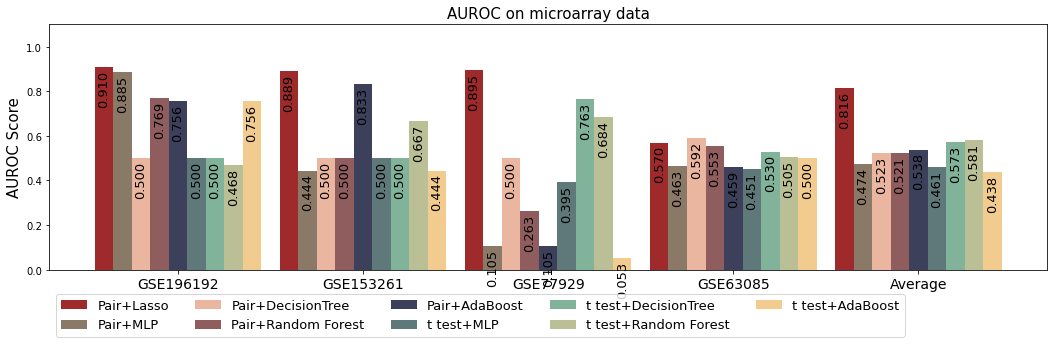

In [53]:
roc2 = results
for mod in roc2['Model'].unique().tolist():
        average = roc2[roc2['Model'] == mod]['AUC'].mean()
        roc2 = roc2.append({'Cohort':'Average','AUC':average,'Model':mod},ignore_index=True)
drawML(roc2)

In [ ]:
x_test_1 = [x_test1,x_test2,x_test3,x_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']
etc_test1 = pair.dftopair(x_test1,idx1,idx2,0.5)
etc_test2 = pair.dftopair(x_test2,idx1,idx2,0.5)
etc_test3 = pair.dftopair(x_test3,idx1,idx2,15)
etc_test4 = pair.dftopair(x_test4,idx1,idx2,15)
etc_test = [etc_test1,etc_test2,etc_test3,etc_test4]


fig,ax = plt.subplots(figsize=(10,8))
for x_test,y_test,name in zip(etc_test,y_test_1,test_name_1):
        #etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        testresult=clf.predict(x_test)
        #tr_pre=clf.predict_proba(cancer_X_test)[:,1]
        fpr, tpr, _= roc_curve(y_test,testresult)
        #roc_auc = auc(fpr,tpr)
        ax.plot(fpr,tpr,linewidth=2,label=name)
        #print(roc_auc)
ax.plot([0,1],[0,1],linestyle='--',color='grey')
plt.legend(fontsize=12)
plt.show()
        
    
for name,clf_ in zip(names,classifiers):
    clf_.fit(x_resampled, y_resampled)
    for x_test,y_test,name_ in zip(t_test_1,y_test_1,test_name_1):
        predt = clf_.predict(x_test)
        fpr, tpr, _ = roc_curve(y_test,predt)
        roc_auc = auc(fpr,tpr)
        results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':name},ignore_index=True)
        print ("test ROC AUC: ",metrics.roc_auc_score(y_test, predt))

/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.988e-03, tolerance: 2.437e-03
  model = cd_fast.enet_coordinate_descent(
/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e-03, tolerance: 2.437e-03
  model = cd_fast.enet_coordinate_descent(
/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

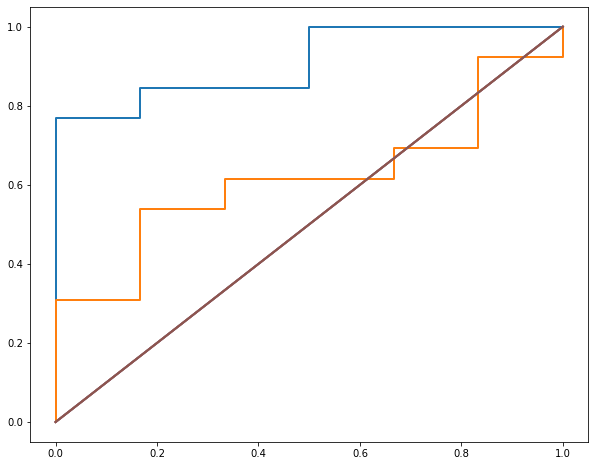

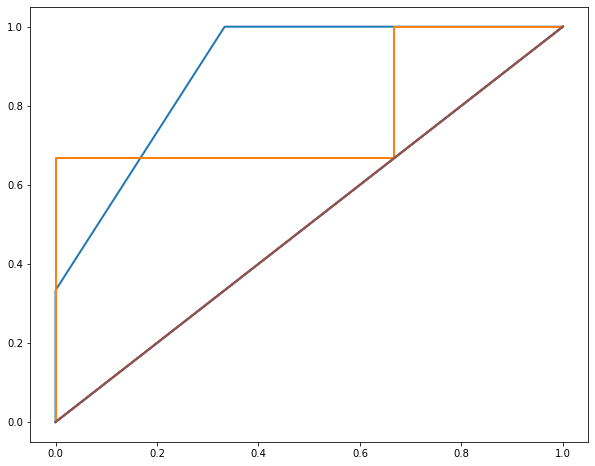

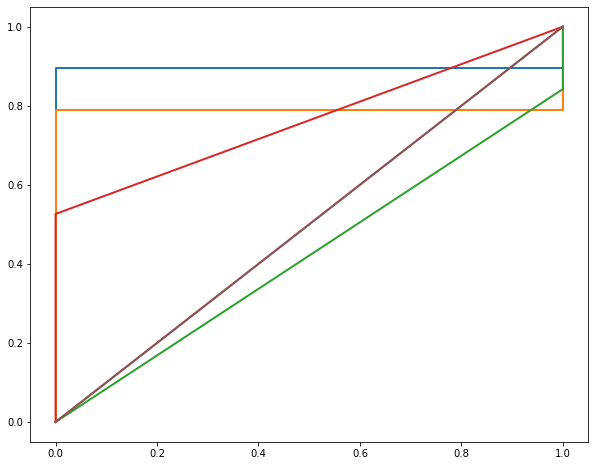

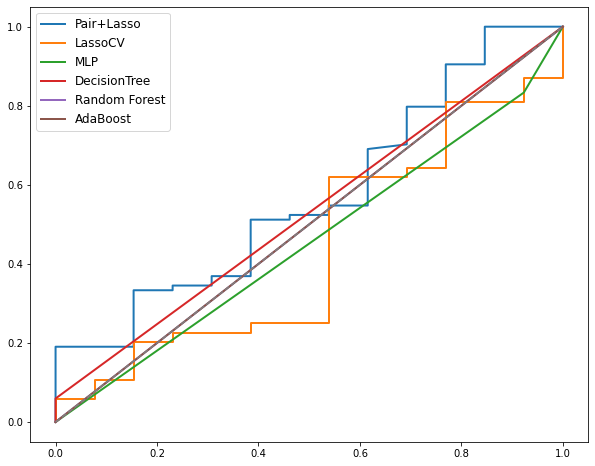

In [245]:

for x_test,y_test,x_test_,y_test_,name_ in zip(etc_test,y_test_1,t_test_1,y_test_1,test_name_1):
        #etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        fig,ax = plt.subplots(figsize=(10,8))
        testresult=clf.predict(x_test)
        #tr_pre=clf.predict_proba(cancer_X_test)[:,1]
        fpr, tpr, _= roc_curve(y_test,testresult)
        #roc_auc = auc(fpr,tpr)
        ax.plot(fpr,tpr,linewidth=2,label='Pair+Lasso')
        #print(roc_auc)
        for name,clf_ in zip(names,classifiers):
            clf_.fit(x_resampled, y_resampled)
            predt = clf_.predict(x_test_)
            fpr, tpr, _ = roc_curve(y_test_,predt)
            roc_auc = auc(fpr,tpr)
            ax.plot(fpr,tpr,linewidth=2,label=name)
            
ax.plot([0,1],[0,1],linestyle='--',color='grey')
plt.legend(fontsize=12)
plt.show()

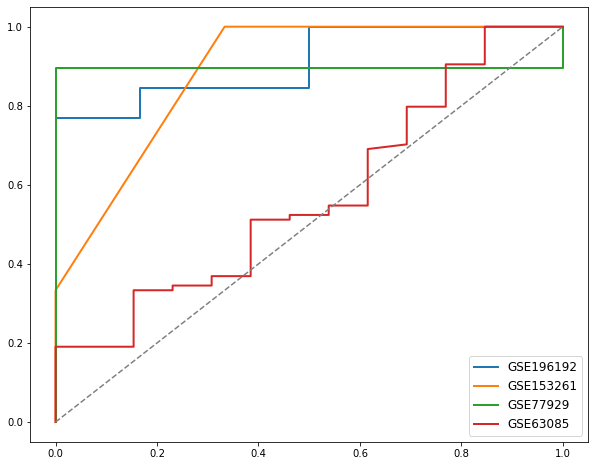

In [240]:
fig,ax = plt.subplots(figsize=(10,8))
for x_test,y_test,name in zip(etc_test,y_test_1,test_name_1):
        #etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        testresult=clf.predict(x_test)
        #tr_pre=clf.predict_proba(cancer_X_test)[:,1]
        fpr, tpr, _= roc_curve(y_test,testresult)
        #roc_auc = auc(fpr,tpr)
        ax.plot(fpr,tpr,linewidth=2,label=name)
        #print(roc_auc)
ax.plot([0,1],[0,1],linestyle='--',color='grey')
plt.legend(fontsize=12)
plt.show()

In [248]:
pd.read_csv("./data111.txt",sep='\t',encoding='utf-16')

,Unnamed: 0,Unnamed: 1,num_control,num_case,Experiment type,Platforms,Unnamed: 6,Organism,disease state,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Train,GSE145974,21,65,Expression profiling by array,GPL13667,Microarray,Homo sapiens,Healthy control,Acute early disseminated Lyme disease,Early convalescent Lyme disease (1 month follo...,Late convalescent Lyme disease (6 months follo...,/
1,Test1,GSE196192,6,13,Expression profiling by high throughput sequen...,GPL11154,RNA-seq,Homo sapiens,uninfected,late Lyme seropositive,early Lyme seronegative,Lyme seropositive,Lyme
2,Test2,GSE153261,3,3,Expression profiling by array,GPL20301,Microarray,Homo sapiens,Non-infected Control,burgdorferi infected - 48 hours,/,/,/
3,Test3,GSE77929,0,20,Expression profiling by high throughput sequen...,GPL11154,RNA-seq,Homo sapiens,acute Lyme pre-treatment (V1),"3 weeks later, immediately following completio...",6 months following treatment completion (V5),/,/
4,Test4,GSE63085,13,84,Expression profiling by high throughput sequen...,GPL11154,RNA-seq,Homo sapiens,acute Lyme pre-treatment (V1),"3 weeks later, immediately following completio...",6 months following treatment completion (V5),/,/


In [56]:
clf5 = linear_model.LassoCV(cv=5,random_state=5)
clf5.fit(x_resampled, y_resampled)


/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.988e-03, tolerance: 2.437e-03
  model = cd_fast.enet_coordinate_descent(
/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e-03, tolerance: 2.437e-03
  model = cd_fast.enet_coordinate_descent(
/mnt/sda/hjwen/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

LassoCV(cv=5, random_state=5)

In [46]:
clf.fit(x_resampled, y_resampled)

Lasso(alpha=0.05)

In [49]:
for x_test,y_test,name_ in zip(t_test_1,y_test_1,test_name_1):
            predt = clf.predict(x_test)
            #predt = clf5.predict_proba(x_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test,predt)
            roc_auc = auc(fpr,tpr)
            results = results.append({'Cohort':name_,'AUC':roc_auc,'Model':'t test+Lasso'},ignore_index=True)
            print ("test ROC AUC: ",metrics.roc_auc_score(y_test, predt))

test ROC AUC:  0.6794871794871794
test ROC AUC:  1.0
test ROC AUC:  0.3157894736842105
test ROC AUC:  0.4432234432234432


In [50]:
results

,Cohort,AUC,Model
0,GSE196192,0.910256,Pair+Lasso
1,GSE153261,0.888889,Pair+Lasso
2,GSE77929,0.894737,Pair+Lasso
3,GSE63085,0.570055,Pair+Lasso
4,GSE196192,0.884615,Pair+MLP
5,GSE153261,0.444444,Pair+MLP
6,GSE77929,0.105263,Pair+MLP
7,GSE63085,0.463370,Pair+MLP
8,GSE196192,0.500000,Pair+DecisionTree
9,GSE153261,0.500000,Pair+DecisionTree


In [ ]:
x_test_1 = [x_test1,x_test2,x_test3,x_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']
etc_test1 = pair.dftopair(x_test1,idx1,idx2,0.5)
etc_test2 = pair.dftopair(x_test2,idx1,idx2,0.5)
etc_test3 = pair.dftopair(x_test3,idx1,idx2,15)
etc_test4 = pair.dftopair(x_test4,idx1,idx2,15)
etc_test = [etc_test1,etc_test2,etc_test3,etc_test4]


t_test_1 = [t_test1,t_test2,t_test3,t_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']


colors = ['#9e2a2b','#897966', '#EAB69F',  '#8F5D5D',
         '#3D405B', '#5F797B', '#81B29A', '#BABF95', '#F2CC8F']
names = ["MLP", "DecisionTree",
         "Random Forest", "AdaBoost"]
classifiers = [
    
    MLPClassifier(hidden_layer_sizes=(1024,),alpha=0.1, max_iter=1000,learning_rate='adaptive', random_state=2),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(random_state=7),
    AdaBoostClassifier(n_estimators=100, learning_rate = 0.1 ,random_state=42)]

In [ ]:

x_test_1 = [x_test1,x_test2]
y_test_1 = [y_test1,y_test2]
x_test_2 = [x_test3,x_test4]
y_test_2 = [y_test3,y_test4]
test_name_1=['GSE196192','GSE153261']
test_name_2=['GSE77929','GSE63085']

results = pd.DataFrame(columns = ['Cohort','AUC','Model'])
for x_test,y_test,name in zip(x_test_1,y_test_1,test_name_1):
        etc_test = pair.dftopair(x_test,idx1,idx2,0.5)
        testresult=clf.predict(etc_test)
        fpr, tpr, _= roc_curve(y_test,testresult)
        roc_auc = auc(fpr,tpr)
        print(roc_auc)
        results = results.append({'Cohort':name,'AUC':roc_auc,'Model':'Pair+Lasso'},ignore_index=True)
for x_test,y_test,name in zip(x_test_2,y_test_2,test_name_2):
        etc_test = pair.dftopair(x_test,idx1,idx2,15)
        testresult=clf.predict(etc_test)
        fpr, tpr, _= roc_curve(y_test,testresult)
        roc_auc = auc(fpr,tpr)
        print(roc_auc)
        results = results.append({'Cohort':name,'AUC':roc_auc,'Model':'Pair+Lasso'},ignore_index=True)
  


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train_pair, y_train)

clf = linear_model.Lasso(alpha = 0.05)
clf.fit(x_resampled, y_resampled)

In [61]:
results_ = pd.DataFrame(columns=['Cohort','AUC','Model'])
results_ = results_.append(results.loc[0:3])
results_ = results_.append(results.loc[40:43])
results_ = results_.append(results.loc[4:7])
results_ = results_.append(results.loc[20:23])
results_ = results_.append(results.loc[8:11])
results_ = results_.append(results.loc[24:27])
results_ = results_.append(results.loc[12:15])
results_ = results_.append(results.loc[28:31])
results_ = results_.append(results.loc[16:19])
results_ = results_.append(results.loc[32:35])

In [62]:
results_

,Cohort,AUC,Model
0,GSE196192,0.910256,Pair+Lasso
1,GSE153261,0.888889,Pair+Lasso
2,GSE77929,0.894737,Pair+Lasso
3,GSE63085,0.570055,Pair+Lasso
40,GSE196192,0.679487,t test+Lasso
41,GSE153261,1.000000,t test+Lasso
42,GSE77929,0.315789,t test+Lasso
43,GSE63085,0.443223,t test+Lasso
4,GSE196192,0.884615,Pair+MLP
5,GSE153261,0.444444,Pair+MLP


In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train_pair,y_train)
ros1 = RandomOverSampler(random_state=0)
x_resampled1, y_resampled1 = ros1.fit_resample(t_train, y_train)

In [72]:
etc_test.shape

(97, 170)

In [ ]:
x_test_1 = [x_test1,x_test2,x_test3,x_test4]
y_test_1 = [y_test1,y_test2,y_test3,y_test4]
test_name_1=['GSE196192','GSE153261','GSE77929','GSE63085']


results_ = pd.DataFrame(columns=['Cohort','AUC','Model'])



for x_test,y_test,name in zip(etc_test,y_test_1,test_name_1):
    testresult = clf.fit(etc_test,y_test)